In [1]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
from ast import literal_eval
import re

In [3]:
import pandas as pd
dataFrameAddress="E:/GammaRaySpectroscopy/Dataset/5DegreeDataset.csv"
dataFrame=pd.read_csv(dataFrameAddress)

In [4]:
dataFrame.head()

,Unnamed: 0,minLats,maxLats,minLongs,maxLongs,averageSpectra,aluminum,calcium,iron,magnesium,oxygen,potassium,silicon,thorium,titanium,uranium
0,0,-90.0,-87.5,-180.0,180.0,[29.81520623 6.77182229 6.50824773 8.760701...,15.151,11.456,3.6233,3.5168,45.289,299.99,20.793,0.46453,0.17034,0.17684
1,1,-87.5,-82.5,-180.0,-135.0,[23.23357393 5.64114848 6.28640883 8.026030...,13.394,10.459,4.2466,4.2240,45.529,376.77,22.029,0.65727,0.11806,0.14017
2,2,-87.5,-82.5,-135.0,-90.0,[23.23357393 5.64114848 6.28640883 8.026030...,13.634,12.915,4.1853,3.5352,44.660,375.20,20.907,0.59783,0.16417,0.25209
3,3,-87.5,-82.5,-90.0,-45.0,[23.23357393 5.64114848 6.28640883 8.026030...,14.642,12.301,3.8019,3.6490,44.706,255.60,20.687,0.44024,0.21359,0.15456
4,4,-87.5,-82.5,-45.0,0.0,[23.23357393 5.64114848 6.28640883 8.026030...,14.030,13.188,3.6497,3.4253,44.777,299.84,20.930,0.41695,0.00000,0.17853


In [5]:
averageSpectra=dataFrame['averageSpectra']
#iterate through the spectra
for i in range(averageSpectra.shape[0]):
    #remove new line characters
    averageSpectra[i]=averageSpectra[i].replace('\n','')
    averageSpectra[i]=averageSpectra[i].strip()
    averageSpectra[i]=averageSpectra[i].replace(' ',',')
    averageSpectra[i]=np.array(list(map(float,re.findall("-?\d+\.\d+",averageSpectra[i]))))
#convert the spectra to numpy array
averageSpectra=averageSpectra.to_numpy()
averageSpectra=np.vstack(averageSpectra)

C:\Users\sandy\AppData\Local\Temp\ipykernel_13676\2164734755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  averageSpectra[i]=averageSpectra[i].replace('\n','')
C:\Users\sandy\AppData\Local\Temp\ipykernel_13676\2164734755.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  averageSpectra[i]=averageSpectra[i].strip()
C:\Users\sandy\AppData\Local\Temp\ipykernel_13676\2164734755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ave

In [6]:
#get abundance values
abundances=dataFrame.iloc[:,6:].to_numpy()

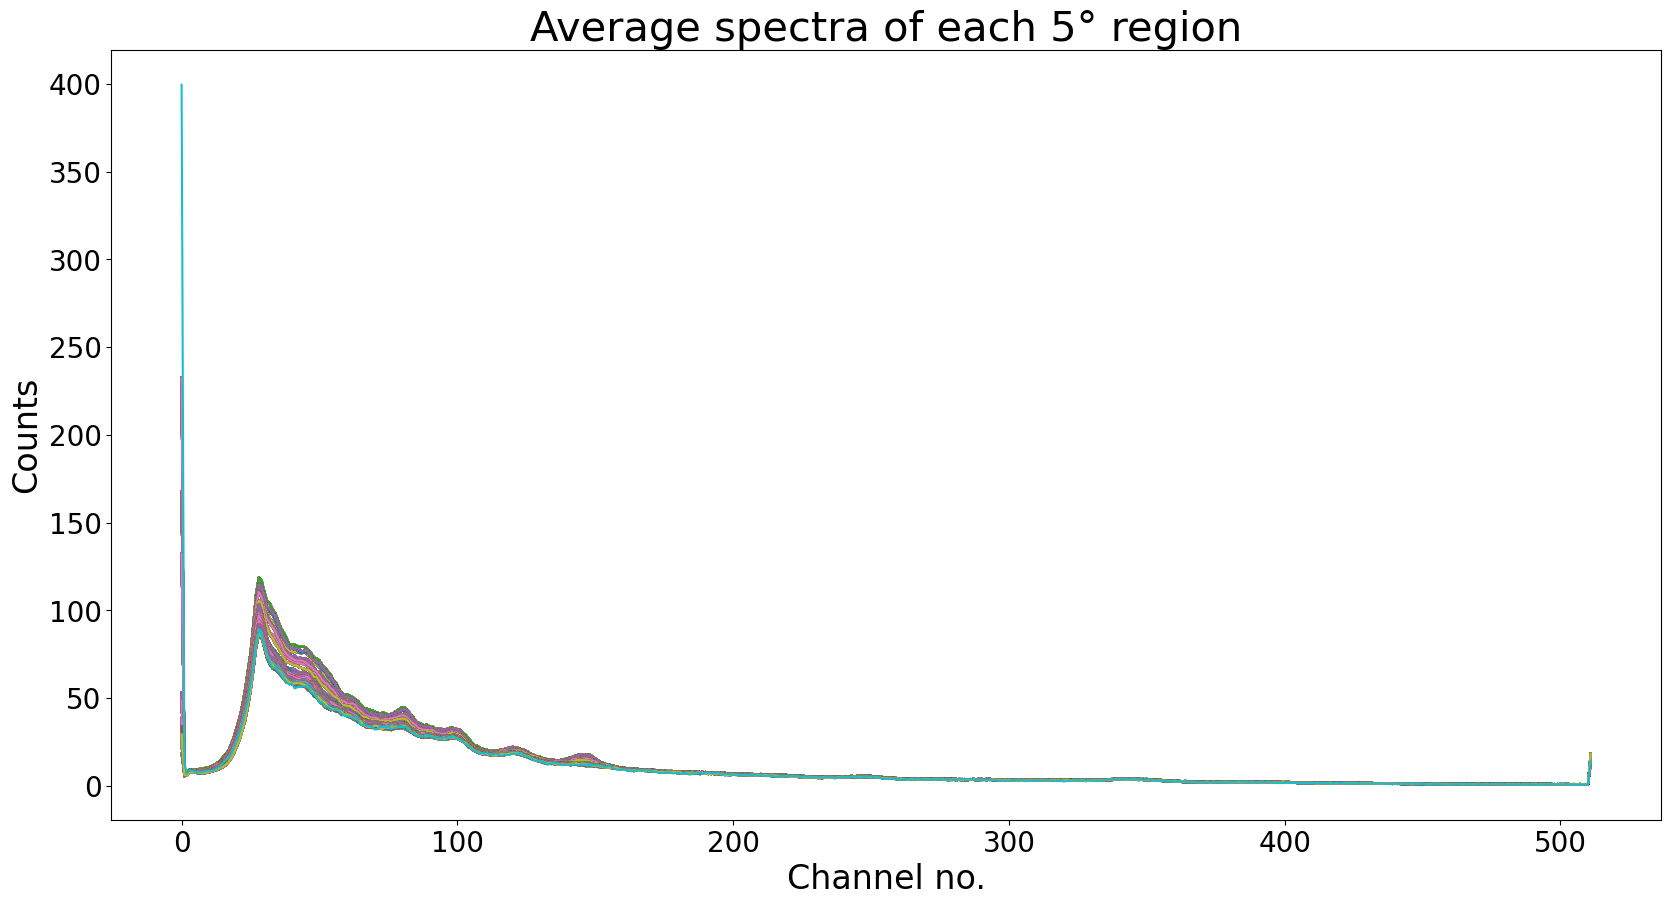

In [7]:
#plot all the spectra
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Channel no.",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.title("Average spectra of each 5\u00B0 region",fontsize=30)

#get create an array containing number of bands
channels=np.arange(averageSpectra.shape[1])
for i in range(averageSpectra.shape[0]):
    plt.plot(channels,averageSpectra[i,:])

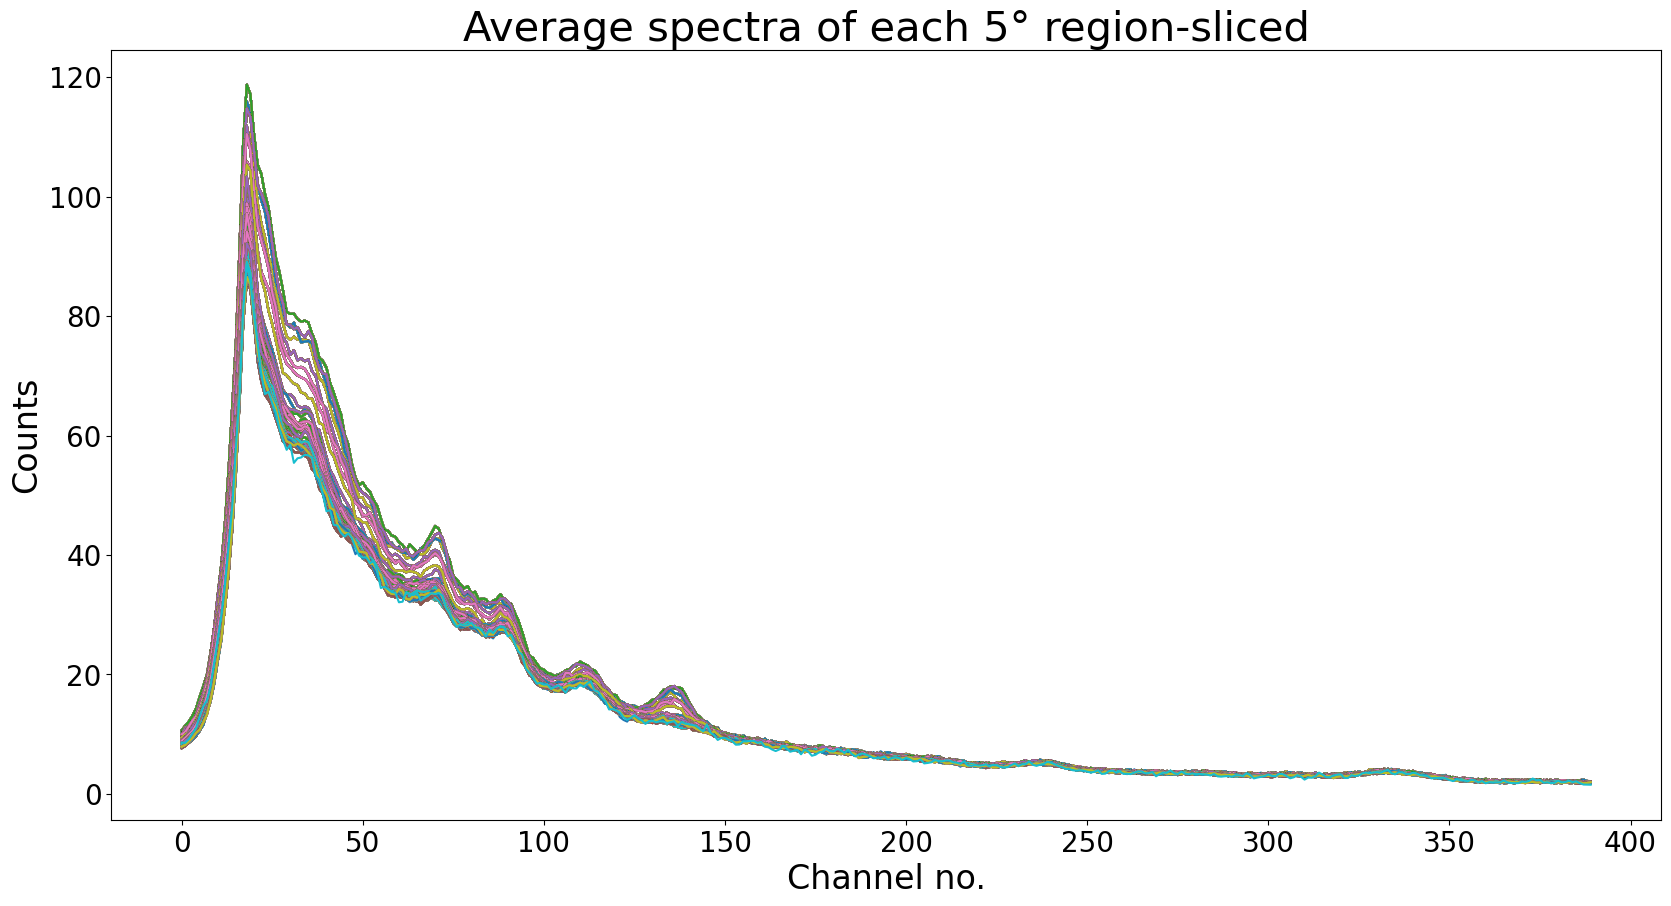

In [8]:
#subset the spectra to remove the first and last parts that have no features
averageSpectra=averageSpectra[:,10:400]
plt.figure(figsize=(20,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Channel no.",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.title("Average spectra of each 5\u00B0 region-sliced",fontsize=30)

#get create an array containing number of bands
channels=np.arange(averageSpectra.shape[1])
for i in range(averageSpectra.shape[0]):
    plt.plot(channels,averageSpectra[i,:])

In [9]:
#get no. of channels in the spectra
noOfChannels=averageSpectra.shape[1]
print(f"No of channels in the spectra:{noOfChannels}")
#get no. of elements whose abundances are to be estimated
noOfElements=abundances.shape[1]
print(f"No. of elements whose abundances are to be estimated:{noOfElements}")
#set a seed value to be used everywhere for reproducability
globalSeed=1.435

No of channels in the spectra:390
No. of elements whose abundances are to be estimated:10


In [10]:
#import tensorflow
import tensorflow as tf

In [11]:
#create the Neural network grapgh containing an input layer
inputLayer=tf.keras.Input(shape=(noOfChannels,1))
nnGraph=inputLayer

In [12]:
#create the first convolutional block
#convolve with filters of size 5
firstConvolutionalLayer=tf.keras.layers.Conv1D(filters=16,kernel_size=5,strides=1,padding='valid',name="first_Conv_Layer")
nnGraph=firstConvolutionalLayer(nnGraph)
#apply relu activation
firstActivationLayer=tf.keras.layers.Activation('relu',name="first_activation")
nnGraph=firstActivationLayer(nnGraph)
#apply batch normalization
firstBatchNormLayer=tf.keras.layers.BatchNormalization(name="first_batch_norm")
nnGraph=firstBatchNormLayer(nnGraph)
#apply dropout
firstDropOutLayer=tf.keras.layers.Dropout(0.5,noise_shape=None,seed=globalSeed,name="first_dropout")
nnGraph=firstDropOutLayer(nnGraph)

In [13]:
#create the second convolutional block
#convolve with filters of size 5
secondConvolutionalLayer=tf.keras.layers.Conv1D(filters=16,kernel_size=5,strides=2,padding='valid',name="second_Conv_Layer")
nnGraph=secondConvolutionalLayer(nnGraph)
#apply relu activation
secondActivationLayer=tf.keras.layers.Activation('relu',name="second_activation")
nnGraph=secondActivationLayer(nnGraph)
#apply batch normalization
secondBatchNormLayer=tf.keras.layers.BatchNormalization(name="second_batch_norm")
nnGraph=secondBatchNormLayer(nnGraph)

#apply dropout
secondDropOutLayer=tf.keras.layers.Dropout(0.4,noise_shape=None,seed=globalSeed,name="second_dropout")
nnGraph=secondDropOutLayer(nnGraph)

In [14]:
#create the third convolutional block
#convolve with filters of size 5
thirdConvolutionalLayer=tf.keras.layers.Conv1D(filters=16,kernel_size=5,strides=2,padding='valid',name="third_Conv_Layer")
nnGraph=thirdConvolutionalLayer(nnGraph)
#apply relu activation
thirdActivationLayer=tf.keras.layers.Activation('relu',name="third_activation")
nnGraph=thirdActivationLayer(nnGraph)
#apply batch normalization
thirdBatchNormLayer=tf.keras.layers.BatchNormalization(name="third_batch_norm")
nnGraph=thirdBatchNormLayer(nnGraph)
#apply dropout
thirdDropOutLayer=tf.keras.layers.Dropout(0.1,noise_shape=None,seed=globalSeed,name="third_dropout")
nnGraph=thirdDropOutLayer(nnGraph)

In [15]:
#create the fully connected block
#flatten the features recieved from the third convolutional block
flattenFeatureVector=tf.keras.layers.Flatten()
nnGraph=flattenFeatureVector(nnGraph)
#add the first fully connected layer
firstFullyConnectedLayer=tf.keras.layers.Dense(300,activation='relu',name='first_fully_cont')
nnGraph=firstFullyConnectedLayer(nnGraph)
#add the second fully connected layer
secondFullyConnectedLayer=tf.keras.layers.Dense(100,activation='relu',name='second_fully_cont')
nnGraph=secondFullyConnectedLayer(nnGraph)
#add the output  layer
outputLayer=tf.keras.layers.Dense(10,activation='sigmoid',name='outputLayer')
nnGraph=outputLayer(nnGraph)

In [16]:
#build the network
jointAbundanceEstimator=tf.keras.Model(inputs=inputLayer,outputs=nnGraph,name="jointAbundanceEstimator")

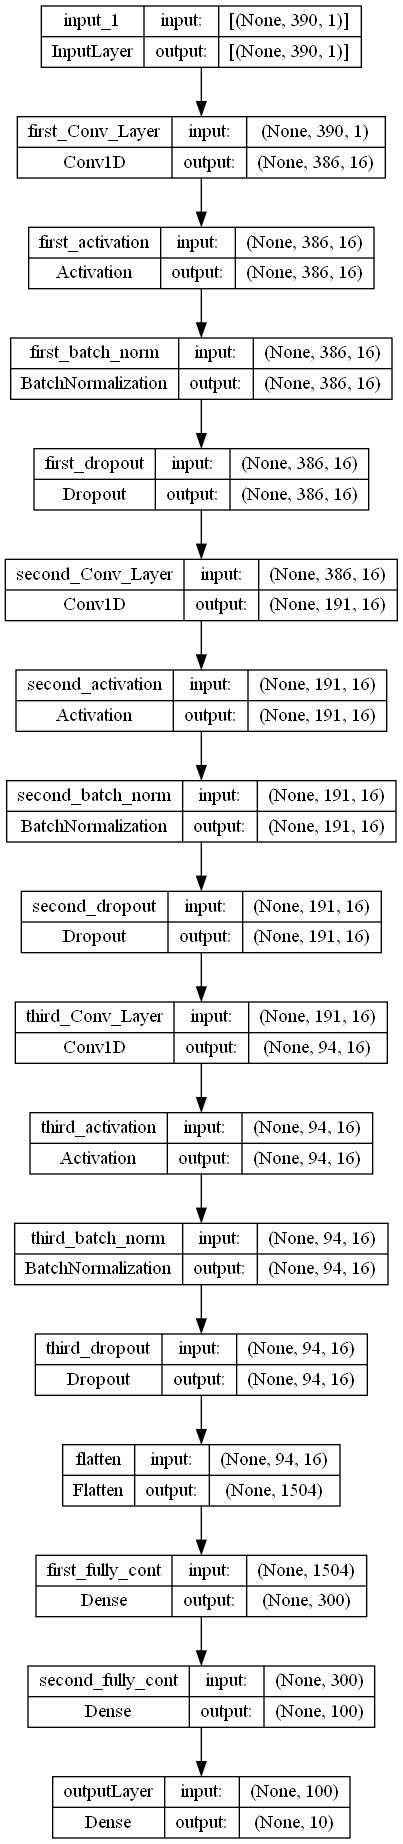

In [17]:
#show the architecture
tf.keras.utils.plot_model(jointAbundanceEstimator,to_file='E:/LunarProspectorTest/CNN_architecture.png',show_shapes=True)

In [18]:
#scale the abundances between 0 and 1
for i in range(abundances.shape[-1]):
    abundances[:,i]=(abundances[:,i]-np.amin(abundances[:,i]))/np.ptp(abundances[:,i])
#break the dataset into training and test sets
from sklearn.model_selection import train_test_split
averageSpectraTrain,averageSpectraTest,abundancesTrain,abundancesTest=train_test_split(averageSpectra,abundances,test_size=0.2)
del train_test_split 

In [30]:
#create the optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5)
#define the loss
lossCalculator=tf.keras.losses.MeanSquaredError()
#define number of epochs for which the network is to be trained
totalNoOfEpochs=1000
#define the batch size
batchSize=1432

In [20]:
#check if the GPU is available
if len(tf.config.list_physical_devices('GPU'))==1:
    print("GPU available")
else:
    print("GPU unavailable")

GPU available


In [21]:
#create lists to hold the training and test losses
trainingLoss=[]
testLoss=[]

In [28]:
#train the network for the specified number of epochs
for currentEpoch in range(totalNoOfEpochs):
    #iterate over all samples with a fixed batch sizes
    for i in range(0,averageSpectraTrain.shape[0],batchSize):

        #compute the gradient and use it update the weights
        with tf.GradientTape() as tape:
            #compute the ouput from the network
            predictedAbundances=jointAbundanceEstimator(averageSpectraTrain[i:i+batchSize,:])
            #compute the Loss
            loss=lossCalculator(tf.cast(predictedAbundances,
                                        tf.float32),
                                tf.cast((abundancesTrain[i:i+batchSize,:]),
                                        tf.float32))

        #compute the gradient for the total loss
        gradientValues=tape.gradient(loss,jointAbundanceEstimator.trainable_variables)
        #optimize for the loss
        optimizer.apply_gradients(zip(gradientValues,jointAbundanceEstimator.trainable_variables))
    #print the gradient at every 100 epochs
    if currentEpoch%500==0:
        print(f"Epoch {currentEpoch} Gradient={round(np.sum([tf.math.reduce_mean(g) for g in gradientValues]),4)}")
    #save the training loss for the last batch
    trainingLoss.append(loss)
    #compute the test loss
    #iterate over all samples with a fixed batch sizes
    for i in range(0,averageSpectraTest.shape[0],batchSize):
        #compute the ouput from the network
            predictedAbundances=jointAbundanceEstimator(averageSpectraTest[i:i+batchSize,:])
            #compute the Loss
            loss=lossCalculator(tf.cast(predictedAbundances,
                                        tf.float32),
                                tf.cast((abundancesTest[i:i+batchSize,:]),
                                        tf.float32))
    #save the test loss for the last batch
    testLoss.append(loss)

Epoch 0 Gradient=9.999999747378752e-05


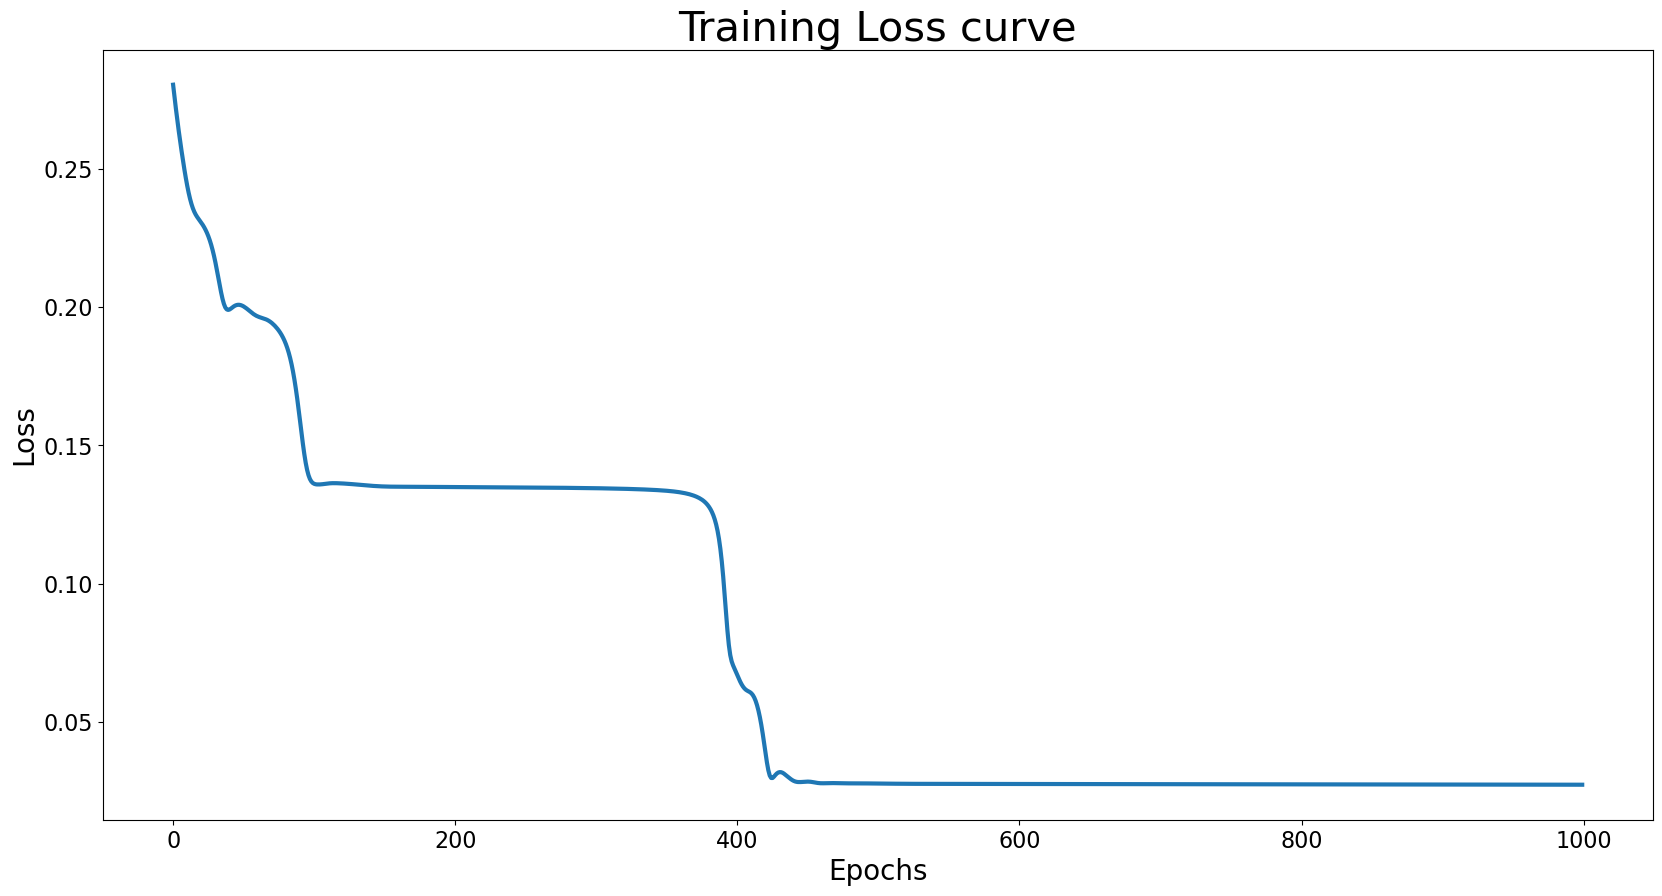

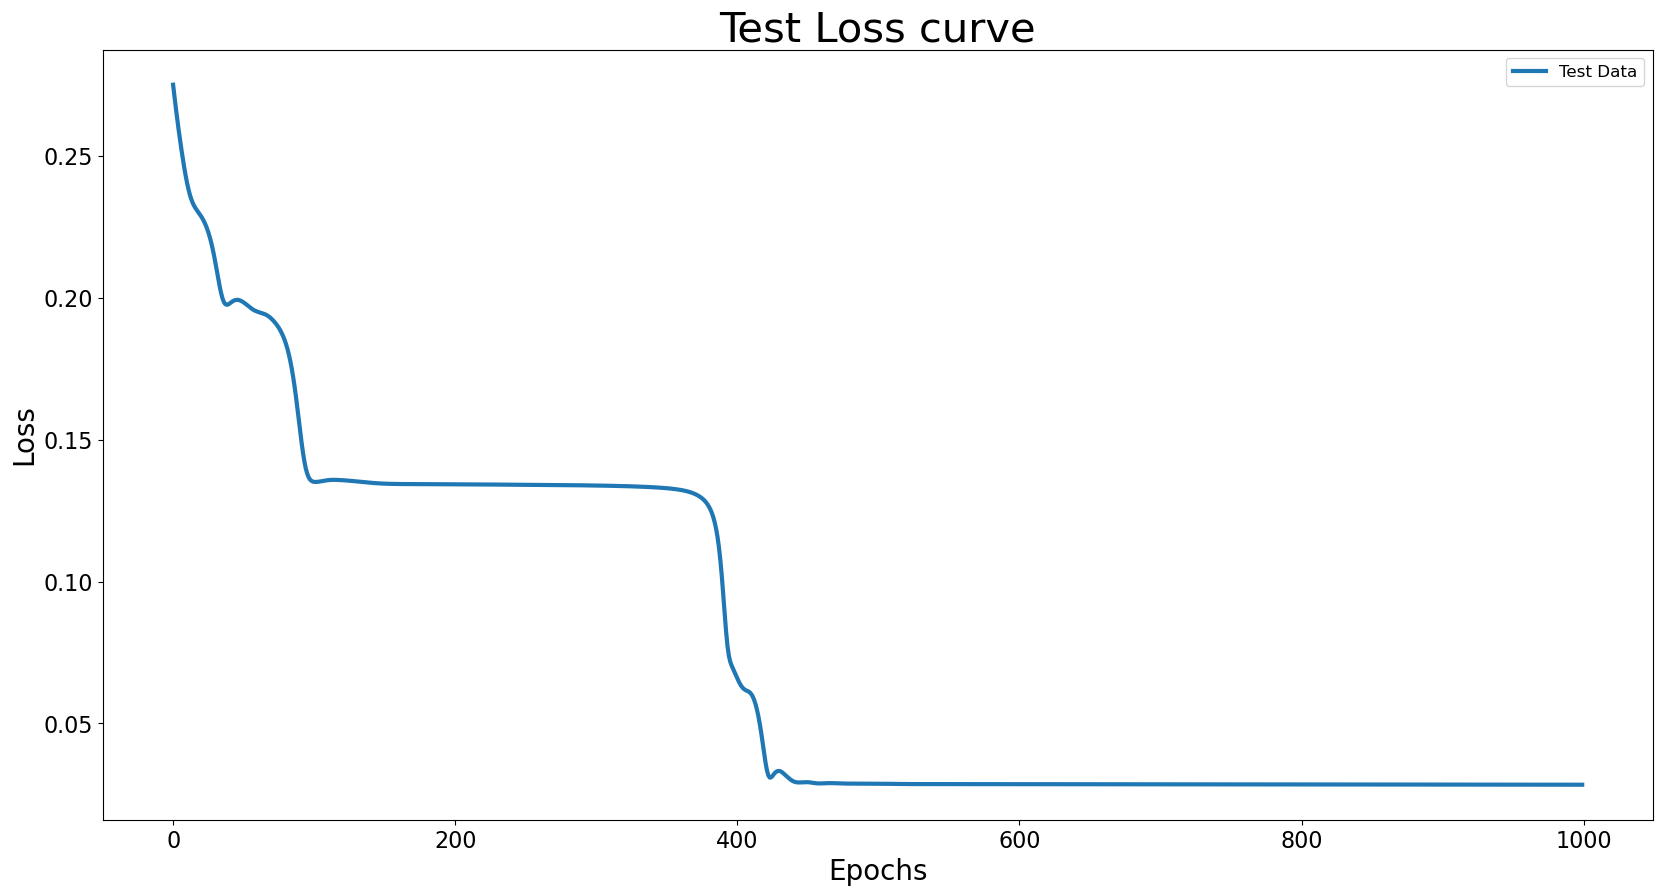

In [31]:
epochList=np.arange(totalNoOfEpochs)
#plot the loss decay
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title("Training Loss curve",fontsize=30)
plt.xlabel("Epochs",fontsize=20)
plt.ylabel("Loss",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(epochList[:],trainingLoss[:],lw=3,label="Training Data")
plt.figure(figsize=(20,10))
plt.title("Test Loss curve",fontsize=30)
plt.xlabel("Epochs",fontsize=20)
plt.ylabel("Loss",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(epochList,testLoss,lw=3,label="Test Data")
plt.legend(loc="best",fontsize=12)

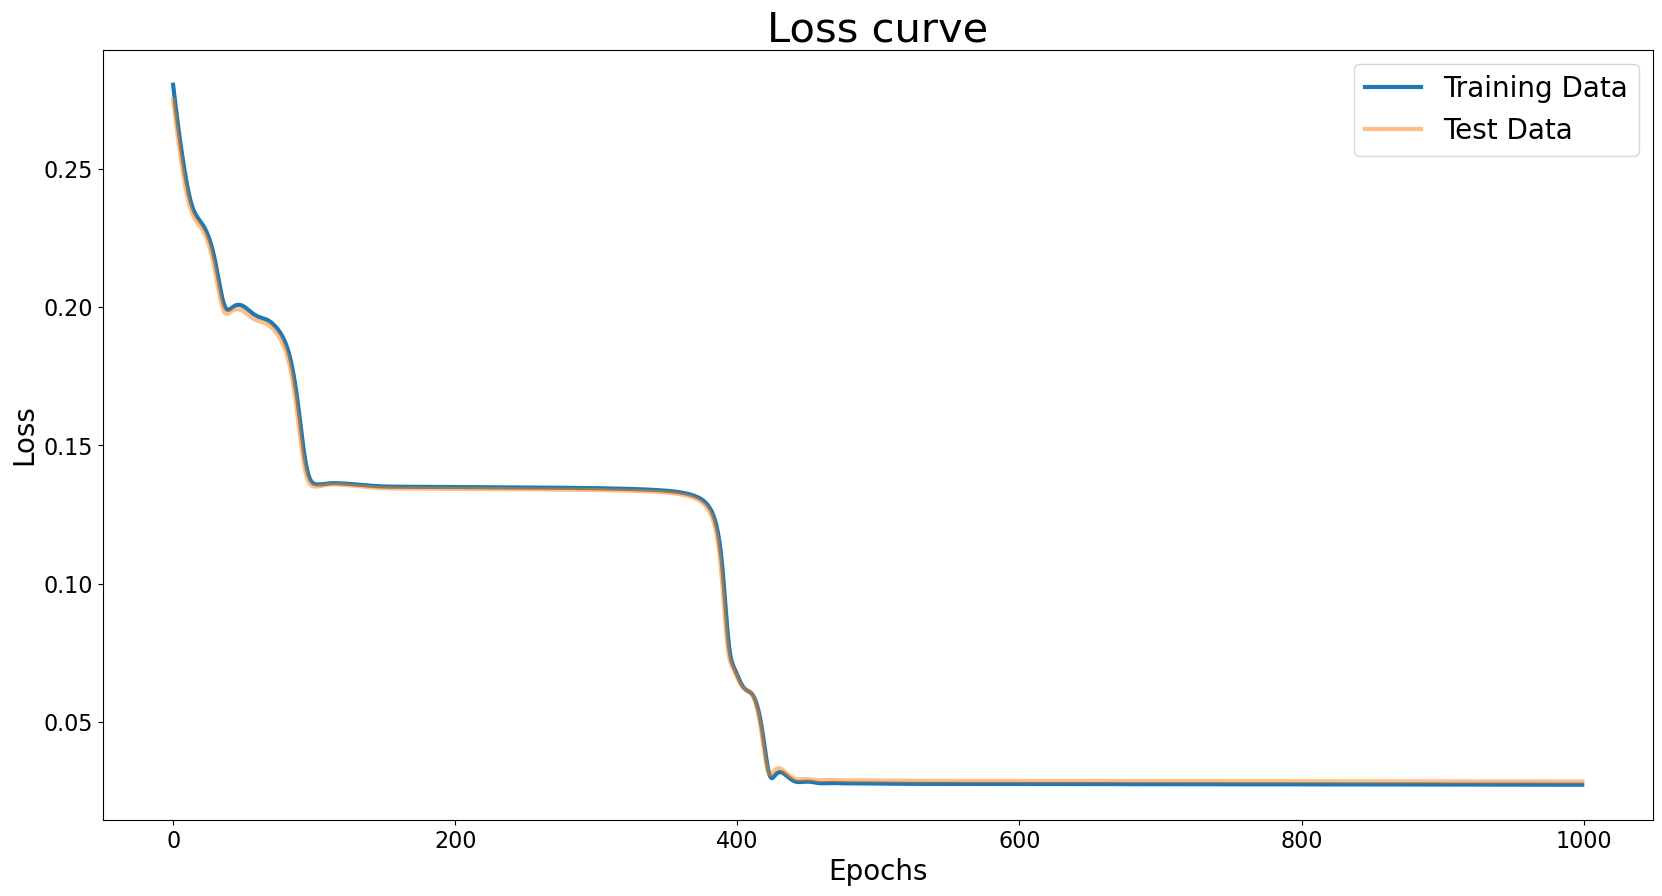

In [35]:
epochList=np.arange(totalNoOfEpochs)
#plot the loss decay
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title("Loss curve",fontsize=30)
plt.xlabel("Epochs",fontsize=20)
plt.ylabel("Loss",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(epochList[:],trainingLoss[:],lw=3,label="Training Data")
plt.plot(epochList,testLoss,lw=3,alpha=0.5,label="Test Data")
plt.legend(loc="best",fontsize=20)

In [33]:
#estimate the abundances for the training and test spectra using the trained model
estimatedAbundancesTrainingSet=jointAbundanceEstimator(averageSpectraTrain).numpy()
estimatedAbundancesTestSet=jointAbundanceEstimator(averageSpectraTest).numpy()
#compute the R2-score of each mineral
trainingRMSEValues=[]
testingRMSEValues=[]
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
for i in range(abundancesTest.shape[1]):
    trainingRMSEValues.append(mean_squared_error(estimatedAbundancesTrainingSet[:,i],abundancesTrain[:,i],squared=False))
    testingRMSEValues.append(mean_squared_error(estimatedAbundancesTestSet[:,i],abundancesTest[:,i],squared=False))

In [34]:
#print the results
elementNames=list(dataFrame.columns.values)[6:]
for i in range(len(elementNames)):
    print(f"{elementNames[i]}----\t\t----RMSE for training data:{round(trainingRMSEValues[i],2)}--\t--RMSE for test data:{round(testingRMSEValues[i],2)}----\t--Avg. Value:{round(np.mean(abundances[:,i]),2)}")

aluminum----		----RMSE for training data:0.14--	--RMSE for test data:0.14----	--Avg. Value:0.61
calcium----		----RMSE for training data:0.13--	--RMSE for test data:0.15----	--Avg. Value:0.56
iron----		----RMSE for training data:0.2--	--RMSE for test data:0.19----	--Avg. Value:0.19
magnesium----		----RMSE for training data:0.17--	--RMSE for test data:0.19----	--Avg. Value:0.41
oxygen----		----RMSE for training data:0.15--	--RMSE for test data:0.15----	--Avg. Value:0.68
potassium----		----RMSE for training data:0.19--	--RMSE for test data:0.19----	--Avg. Value:0.2
silicon----		----RMSE for training data:0.15--	--RMSE for test data:0.15----	--Avg. Value:0.65
thorium----		----RMSE for training data:0.17--	--RMSE for test data:0.19----	--Avg. Value:0.15
titanium----		----RMSE for training data:0.16--	--RMSE for test data:0.15----	--Avg. Value:0.12
uranium----		----RMSE for training data:0.17--	--RMSE for test data:0.19----	--Avg. Value:0.15


In [27]:
abundances.shape

(1790, 10)